In [1]:
import  dill
dill.load_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')

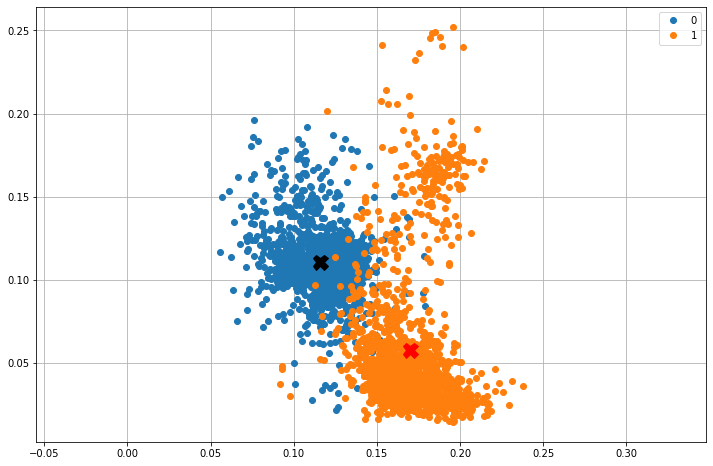

In [2]:
import pandas as pd
def plot2d(data):
    classes = data['label'].unique()
    for c in classes:
        plt.plot(data.where(data['label']==c).dropna()['meanfun'].values,
                 data.where(data['label']==c).dropna()['IQR'].values,'o', label=c)

    plt.axis('equal')
    plt.grid()

plt.figure(figsize=(12,8))
m1=data[data["label"]==0][["meanfun","IQR"]].mean()
m2=data[data["label"]==1][["meanfun","IQR"]].mean()
plot2d(data)
plt.plot(m1[0],m1[1],'Xk',markersize=15)
plt.plot(m2[0],m2[1],'Xr',markersize=15)
plt.legend()
plt.show()
#custom plot of the features

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
lda = LDA()
lda.fit(data_train[["meanfun","IQR"]],data_train["label"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [25]:
preds=lda.predict(data_test[["meanfun","IQR"]])
lda.score(data_test[["meanfun","IQR"]],data_test["label"])

0.9457070707070707

In [26]:
print("Classification report:\n",classification_report(data_test.label,preds))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       391
           1       0.97      0.93      0.95       401

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [27]:
print("LDA coefficients (w)",lda.coef_)
print("Threeshold value (w_0)",lda.intercept_)
print("Input mean values\n",lda.means_)

LDA coefficients (w) [[167.22275908 -46.58071209]]
Threeshold value (w_0) [-20.02550598]
Input mean values
 [[0.11599041 0.11053273]
 [0.16988835 0.05630154]]


<h1>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
lda = LDA()
lda.fit(data_train.drop(columns="label"),data_train["label"])
preds=lda.predict(data_test.drop(columns="label"))
print("Classification report:\n",classification_report(data_test.label,preds))

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       391
           1       0.97      0.96      0.96       401

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



D:\Programmi\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<h1> Without outliers

In [8]:
lda_clean = LDA()
lda_clean.fit(data_clean_train.drop(columns="label"),data_clean_train["label"])
preds=lda_clean.predict(data_clean_test.drop(columns="label"))
print("Classification report:\n",classification_report(data_clean_test.label,preds))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       382
           1       0.99      0.98      0.98       350

    accuracy                           0.98       732
   macro avg       0.99      0.98      0.98       732
weighted avg       0.99      0.98      0.98       732



D:\Programmi\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [4]:
m1=data_clean_train[data_clean_train["label"]==0][["meanfun","IQR"]].mean()
m2=data_clean_train[data_clean_train["label"]==1][["meanfun","IQR"]].mean()
SW = np.cov(data_clean_train[data_clean_train["label"]==0][["meanfun","IQR"]].T) + np.cov(data_clean_train[data_clean_train["label"]==1][["meanfun","IQR"]].T)
from scipy.linalg import inv
w = inv(SW).dot((m2-m1))
w=w/np.sqrt((w**2).sum())
print(w)

[ 0.67127272 -0.74121045]


In [8]:
Y=w.dot(data_clean_train[["meanfun","IQR"]].T)
g0 = norm(*norm.fit(Y[data_clean_train["label"]==0]))
g1 = norm(*norm.fit(Y[data_clean_train["label"]==1]))

In [10]:
def calculate(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = calculate(g0.mean(),g1.mean(),g0.std(), g1.std())
#function that calculate where the gaussians cross
y0=solutions[1]

In [7]:
x1 = 0.05; x2 = 0.225;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.figure(figsize=(12,6))

plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0.1,-0.08,-w[0],-w[1],scale=1.9)
plt.axis('equal')
sns.scatterplot(data_clean_train["meanfun"],data_clean_train["IQR"],hue=data_clean_train["label"])
plt.grid()
#plot with decision boundary and projected data's direction

NameError: name 'y0' is not defined

In [7]:
lda = LDA()
lda.fit(data_clean_train[["meanfun","IQR"]],data_clean_train["label"])
preds=lda.predict(data_clean_test[["meanfun","IQR"]])
print("Classification report:\n",classification_report(data_clean_test.label,preds))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       382
           1       0.98      0.97      0.97       350

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg       0.98      0.98      0.98       732



<h1>---------------------------------------------------------------------------------------------------------------------------------------------------PCA

In [7]:
pca_lda = LDA()
pca_lda.fit(pca_train[["n3","n4"]],pca_train["label"])
preds=pca_lda.predict(pca_test[["n3","n4"]])
print("Classification report:\n",classification_report(pca_test.label,preds))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.99      0.99      0.99       350

    accuracy                           0.99       732
   macro avg       0.99      0.99      0.99       732
weighted avg       0.99      0.99      0.99       732



In [11]:
dill.dump_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')